In [1]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [2]:
# Load and inspect the dataset
data = pd.read_csv("creditcard.csv")

In [3]:
print(data)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.01830

In [4]:

# Preprocess the data
X = data.drop('Class', axis=1)
y = data['Class']

In [5]:
pd.options.display.max_columns = None
print(f"Number of columns: {data.shape[1]}")
print(f"Number of rows: {data.shape[0]}")
print(data.info())

Number of columns: 31
Number of rows: 284807
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20

In [6]:
# checking the number of missing values in each column
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
# Data preprocessing
data['Amount'] = StandardScaler().fit_transform(pd.DataFrame(data['Amount']))
data = data.drop(['Time'], axis=1)
data = data.drop_duplicates()
print("Data shape after dropping duplicates:", data.shape)
print("Class distribution:\n", data['Class'].value_counts())

Data shape after dropping duplicates: (275663, 30)
Class distribution:
 Class
0    275190
1       473
Name: count, dtype: int64


<Axes: xlabel='Class'>

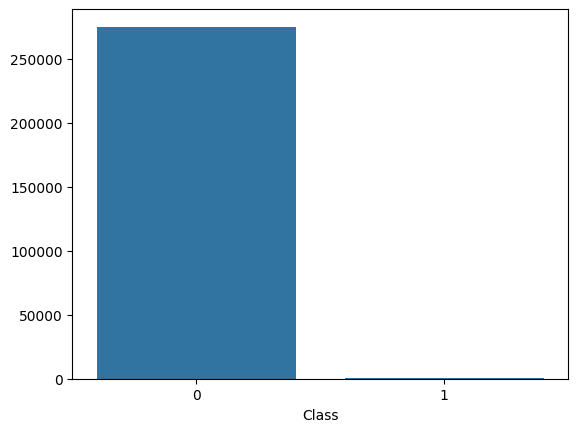

In [8]:
class_counts = data['Class'].value_counts()
sns.barplot(x=class_counts.index, y=class_counts.values)

In [9]:
plt.show()

In [10]:
# Define features and target
X = data.drop('Class', axis=1)
y = data['Class']

In [11]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

C:\Users\System75\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [13]:
# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

In [14]:
# Train and evaluate each classifier using 5-fold cross-validation
for name, clf in classifiers.items():
    print(f"\n========== {name} ==========")
    
    # 5-fold cross-validation scores
    cv_scores = cross_val_score(clf, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
    print(f"5-fold CV Accuracy scores: {cv_scores}")
    print(f"Mean CV Accuracy: {cv_scores.mean()}")
    
    # Fit the model on resampled training data
    clf.fit(X_train_resampled, y_train_resampled)
    
    # Predict on the test set
    y_pred = clf.predict(X_test)
    
    # Display evaluation metrics
    print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")


========== Logistic Regression ==========
5-fold CV Accuracy scores: [0.94616171 0.9463655  0.94703551 0.94676297 0.94703551]
Mean CV Accuracy: 0.9466722398353197
Test Accuracy: 0.9767834146518419
Precision: 0.05930318754633061
Recall: 0.8791208791208791
F1 Score: 0.1111111111111111

========== Decision Tree Classifier ==========
5-fold CV Accuracy scores: [0.99844424 0.9985805  0.99848965 0.99855779 0.99860321]
Mean CV Accuracy: 0.9985350766094492
Test Accuracy: 0.9976057896359712
Precision: 0.3815028901734104
Recall: 0.7252747252747253
F1 Score: 0.5

========== Random Forest Classifier ==========
5-fold CV Accuracy scores: [0.99990915 0.9998183  0.99992051 0.9998183  0.9998978 ]
Mean CV Accuracy: 0.9998728127524663
Test Accuracy: 0.9993833094516895
Precision: 0.8275862068965517
Recall: 0.7912087912087912
F1 Score: 0.8089887640449438

========== Support Vector Machine ==========
5-fold CV Accuracy scores: [0.97655008 0.97623184 0.97767406 0.97623184 0.97696999]
Mean CV Accuracy: 0.97

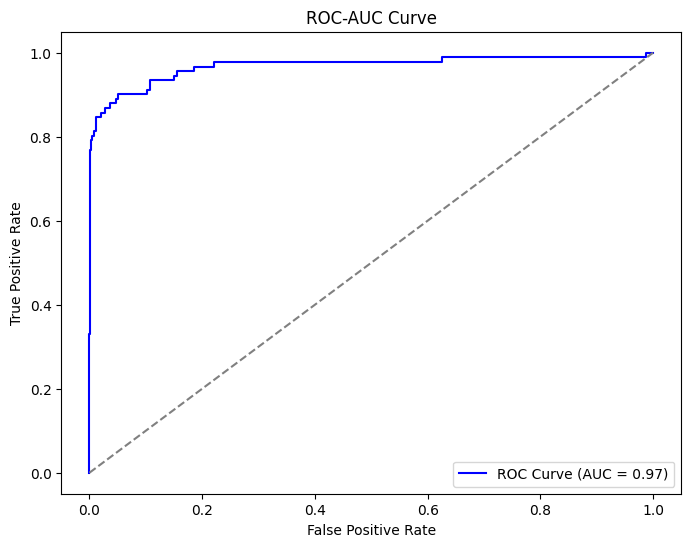

In [15]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Check if the classifier supports probability predictions
if hasattr(clf, "predict_proba"):
    y_prob = clf.predict_proba(X_test)[:, 1]  # Get fraud class probability
elif hasattr(clf, "decision_function"):  # SVM alternative
    y_prob = clf.decision_function(X_test)  # Use decision scores

# Compute ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC-AUC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend()
plt.show()


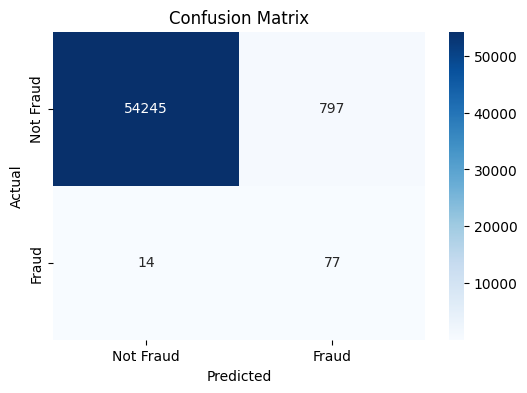

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


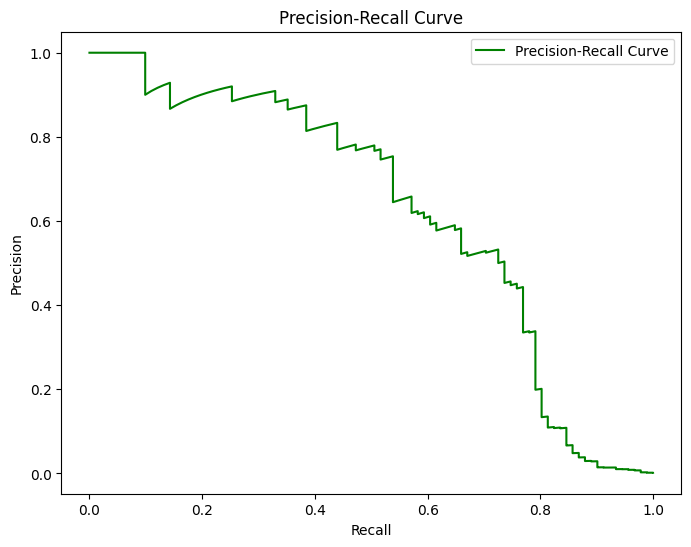

In [17]:
from sklearn.metrics import precision_recall_curve

# Compute Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', label="Precision-Recall Curve")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


In [18]:
import numpy as np

# Check if the model supports feature importances
if hasattr(clf, "feature_importances_"):
    feature_importances = clf.feature_importances_
    sorted_idx = np.argsort(feature_importances)

    plt.figure(figsize=(10, 6))
    plt.barh(X_test.columns[sorted_idx], feature_importances[sorted_idx], color='skyblue')
    plt.xlabel("Feature Importance")
    plt.title("Feature Importance in Fraud Detection")
    plt.show()


C:\Users\System75\AppData\Local\Temp\ipykernel_4768\3728309277.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="coolwarm")


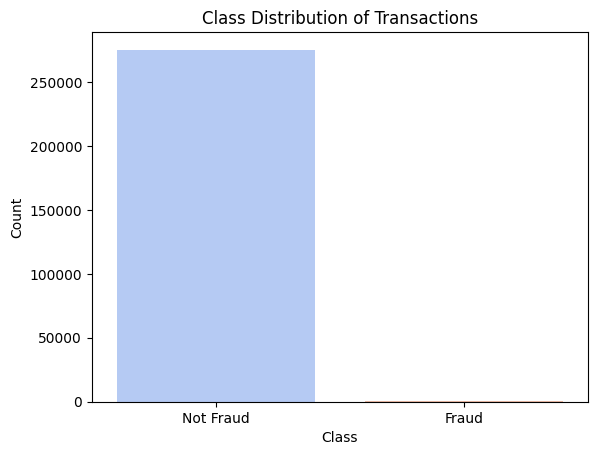

In [19]:
class_counts = y.value_counts()
sns.barplot(x=class_counts.index, y=class_counts.values, palette="coolwarm")
plt.xticks([0, 1], ["Not Fraud", "Fraud"])
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution of Transactions")
plt.show()


C:\Users\System75\AppData\Local\Temp\ipykernel_4768\2200881387.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y, y=data["Amount"], palette="Set2")


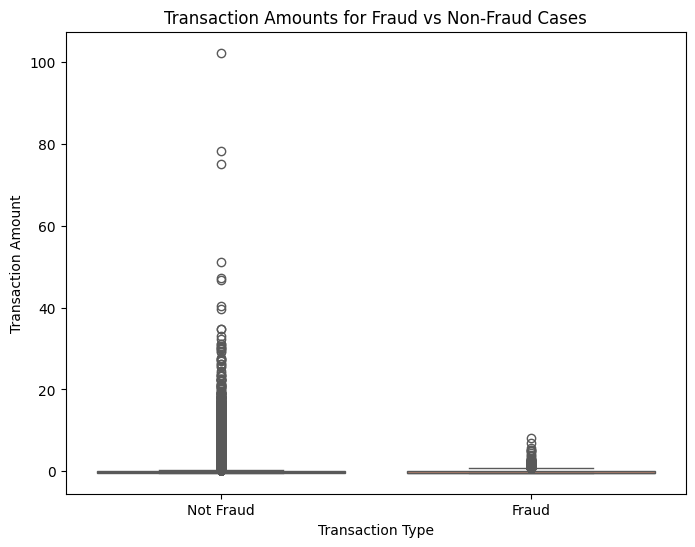

In [20]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=y, y=data["Amount"], palette="Set2")
plt.xticks([0, 1], ["Not Fraud", "Fraud"])
plt.xlabel("Transaction Type")
plt.ylabel("Transaction Amount")
plt.title("Transaction Amounts for Fraud vs Non-Fraud Cases")
plt.show()


In [21]:
import joblib

# Save trained models
joblib.dump(classifiers["Logistic Regression"], "logistic_regression.pkl")
joblib.dump(classifiers["Decision Tree Classifier"], "decision_tree.pkl")
joblib.dump(classifiers["Random Forest Classifier"], "random_forest.pkl")
joblib.dump(classifiers["Support Vector Machine"], "svm.pkl")

print("✅ All models saved successfully!")


✅ All models saved successfully!


In [22]:
# Train and save the final model (e.g., Decision Tree Classifier for demo purposes)
dtc = DecisionTreeClassifier()
dtc.fit(X_train_resampled, y_train_resampled)
joblib.dump(dtc, "credit_card_model.pkl")

['credit_card_model.pkl']

In [23]:
# Load and test the model
model = joblib.load("credit_card_model.pkl")
sample = [[-1.3598071336738, -0.0727811733098497, 2.53634673796914, 1.37815522427443, -0.338320769942518,
           0.462387777762292, 0.239598554061257, 0.0986979012610507, 0.363786969611213, 0.0907941719789316,
           -0.551599533260813, -0.617800855762348, -0.991389847235408, -0.311169353699879, 1.46817697209427,
           -0.470400525259478, 0.207971241929242, 0.0257905801985591, 0.403992960255733, 0.251412098239705,
           -0.018306777944153, 0.277837575558899, -0.110473910188767, 0.0669280749146731, 0.128539358273528,
           -0.189114843888824, 0.133558376740387, -0.0210530534538215, 149.62]]
prediction = model.predict(sample)

C:\Users\System75\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [24]:
if prediction[0] == 0:
    print("Normal Transaction")
else:
    print("Fraud Transaction")

Normal Transaction
